In [44]:
import face_recognition
from PIL import Image
from PIL import ImageDraw
import PIL.Image as Image
import os
import base64
from PIL import Image
from io import BytesIO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
def imprimirCara(imagen):
    pil_image = Image.fromarray(imagen)
    pil_image.show()
    
def imprimirTodo(imagen,cara):
    imprimirCara(imagen)
    pil_image = Image.fromarray(recortarCara(imagen,cara))
    pil_image.show()

def recortarCara(imagen, cara):
    top, right, bottom, left = cara
    cara_recortada = imagen[top:bottom, left:right]
    return cara_recortada

def hasFace(face_locations):
    if len(face_locations) > 0:
        return True
    else:
        return False

In [3]:
def info_foto(ruta, imagen):
    #Carga imagen
    imagen = face_recognition.load_image_file(ruta)
    #Imagen en String
    
    #Busca la cara
    face_locations = face_recognition.face_locations(imagen)
    if not hasFace(face_locations):
        return
    
    #Recorta la cara
    cara = face_locations[0]

    #Patrones de la cara
    face_landmarks_list = face_recognition.face_landmarks(imagen)
    caracteristicas = []
    for clave,valor in face_landmarks_list[0].items():
        caracteristicas.append(valor)
    
    folder_name = os.path.basename(os.path.dirname(ruta))
    
    return [imagen, caracteristicas,cara, folder_name]

In [4]:
def sacar_datos_imagen(carpeta_raiz):
    matriz_principal = {'Imagen':[],'Rostro':[],'Corte':[],'Etiqueta':[]}
    # Recorrer todas las carpetas, subcarpetas y archivos de la carpeta raíz
    for carpeta_actual, subcarpetas, archivos in os.walk(carpeta_raiz):
        # Recorrer todos los archivos de la carpeta actual
        for archivo in archivos:
            # Obtener la ruta completa del archivo
            ruta_completa = os.path.join(carpeta_actual, archivo)
            try:
                with Image.open(ruta_completa):
                    # Imprimir el nombre del archivo y el directorio
                    folder_name = os.path.basename(os.path.dirname(ruta_completa))
                    print(f"Imagen: {archivo} - Directorio: {folder_name}")
                    dato = info_foto(ruta_completa, archivo)
                    if dato != None:
                        matriz_principal['Imagen'].append(dato[0])
                        matriz_principal['Rostro'].append(dato[1])
                        matriz_principal['Corte'].append(dato[2])
                        matriz_principal['Etiqueta'].append(dato[3])
                        #procesoCapturaDato(dato)

            except (IOError, OSError):
                # Ignorar archivos que no son imágenes
                pass
    print("Terminado")
    return matriz_principal




In [5]:
def checandoUnaFoto():
    print("Hola")
    rutaE = "Marzo\\BD\\corpus_images\\bored\\227.jpeg"
    imagen = face_recognition.load_image_file(rutaE)
    return info_foto(rutaE,imagen)


def todoEnUnString(matriz):
    if(len(matriz) == 0):
        print("No hay datos que guardar")
        return
    string = ""
    for item in matriz:
        string += str(item)+"|"
    return string

def agregar_linea_a_archivo(archivo, texto):
    # Abrir el archivo en modo de escritura (append)
    with open(archivo, 'a') as archivo_salida:
        # Escribir el texto en una nueva línea
        archivo_salida.write(texto + '\n')

def procesoCapturaDato(matriz):
    texto = todoEnUnString(matriz)
    if texto != None:
        agregar_linea_a_archivo("datos.txt", texto)



In [7]:
print("Inicio")
ruta_de_tu_carpeta = 'C:\\Users\\Waldosir\\Documents\\2doCodigo\\TopicoIA\\Marzo\\BD\\corpus_images'
#ruta_Prueba = "Marzo\image.png"
matriz = sacar_datos_imagen(ruta_de_tu_carpeta)
#matrizPrueba = checandoUnaFoto()


Inicio
Imagen: 100.jpeg - Directorio: bored
Imagen: 101.jpeg - Directorio: bored
Imagen: 102.jpeg - Directorio: bored
Imagen: 103.jpeg - Directorio: bored
Imagen: 104.jpeg - Directorio: bored
Imagen: 105.jpeg - Directorio: bored
Imagen: 106.jpeg - Directorio: bored
Imagen: 107.jpeg - Directorio: bored
Imagen: 108.jpeg - Directorio: bored
Imagen: 109.jpeg - Directorio: bored
Imagen: 110.jpeg - Directorio: bored
Imagen: 111.jpeg - Directorio: bored
Imagen: 112.jpeg - Directorio: bored
Imagen: 113.jpeg - Directorio: bored
Imagen: 114.jpeg - Directorio: bored
Imagen: 115.jpeg - Directorio: bored
Imagen: 116.jpeg - Directorio: bored
Imagen: 117.jpeg - Directorio: bored
Imagen: 118.jpeg - Directorio: bored
Imagen: 119.jpeg - Directorio: bored
Imagen: 120.jpeg - Directorio: bored
Imagen: 121.jpeg - Directorio: bored
Imagen: 122.jpeg - Directorio: bored
Imagen: 123.jpeg - Directorio: bored
Imagen: 124.jpeg - Directorio: bored
Imagen: 125.jpeg - Directorio: bored
Imagen: 126.jpeg - Directorio: 

In [8]:
#print(matrizPrueba)
df = pd.DataFrame(matriz)
df.head()
#print("Final")

,Imagen,Rostro,Corte,Etiqueta
0,"[[[165, 165, 163], [165, 165, 163], [165, 166,...","[[(268, 262), (268, 279), (270, 295), (272, 31...","(202, 408, 356, 253)",bored
1,"[[[163, 165, 160], [164, 166, 161], [164, 166,...","[[(269, 263), (269, 279), (270, 296), (273, 31...","(202, 408, 356, 253)",bored
2,"[[[165, 165, 163], [165, 165, 163], [165, 165,...","[[(272, 263), (272, 279), (273, 295), (276, 31...","(202, 408, 356, 253)",bored
3,"[[[165, 166, 161], [165, 166, 161], [165, 166,...","[[(271, 263), (271, 279), (273, 295), (275, 31...","(202, 408, 356, 253)",bored
4,"[[[165, 166, 161], [165, 166, 161], [165, 166,...","[[(271, 265), (271, 280), (273, 296), (275, 31...","(202, 408, 356, 253)",bored


In [ ]:
df.to_csv('datosNew.csv', index=False)

Un solo archivo

In [26]:
def info_foto_nuevo(ruta):
    #Carga imagen
        imagen = face_recognition.load_image_file(ruta)
        imagen_recortada = np.array(Image.fromarray(imagen).resize((150, 150)))
        #Imagen en String
        
        #Busca la cara
        face_locations = face_recognition.face_locations(imagen)
        
        #Recorta la cara
        cara = face_locations[0]

        #Patrones de la cara
        face_landmarks_list = face_recognition.face_landmarks(imagen)
        caracteristicas = []
        for clave,valor in face_landmarks_list[0].items():
            caracteristicas.append(valor)
        
        folder_name = os.path.basename(os.path.dirname(ruta))

        #print("Imagen ->" + str(imagen))
        #print("Imagen recortada ->" + str(imagen_recortada))
        #imprimirCara(imagen)
        #imprimirCara(imagen_recortada)
        

        
        return [imagen_recortada, caracteristicas,cara, folder_name]

In [59]:
imagen = "228"+".jpeg"
Route_Error = "C:\\Users\\Waldosir\\Documents\\2doCodigo\\TopicoIA\\Marzo\\BD\\corpus_images\\bored\\"+imagen
try:
    imagenPrueba = Image.open(Route_Error)
    matriz_Prueba = info_foto_nuevo(Route_Error, imagenPrueba)
    print(matriz_Prueba)

except Exception as e:
    print("Error al abrir el archivo:", e)



Error al abrir el archivo: list index out of range


In [41]:
def sacar_datos_imagen_nuevo(carpeta_raiz):
    matriz_principal = []
    for carpeta_actual, subcarpetas, archivos in os.walk(carpeta_raiz):
        for archivo in archivos:
            ruta_completa = os.path.join(carpeta_actual, archivo)
            try:
                with Image.open(ruta_completa):
                    # Imprimir el nombre del archivo y el directorio
                    folder_name = os.path.basename(os.path.dirname(ruta_completa))
                    print(f"Imagen: {archivo} - Directorio: {folder_name}")
                    #Carga imagen
                    imagen = face_recognition.load_image_file(ruta_completa)
                    imagen_recortada = np.array(Image.fromarray(imagen).resize((150, 150)))
                    #Imagen en String
                    
                    #Busca la cara
                    face_locations = face_recognition.face_locations(imagen_recortada)
                    
                    #Recorta la cara
                    cara = face_locations[0]
                    top, right, bottom, left = cara
                    cara_recortada = imagen_recortada[top:bottom, left:right]

                    #Patrones de la cara
                    face_landmarks_list = face_recognition.face_landmarks(imagen)
                    caracteristicas = []
                    for clave,valor in face_landmarks_list[0].items():
                        caracteristicas.append(valor)
                    
                    folder_name = os.path.basename(os.path.dirname(ruta_completa))

                    #print("Imagen ->" + str(imagen))
                    #print("Imagen recortada ->" + str(imagen_recortada))
                    #imprimirCara(imagen)
                    #imprimirCara(imagen_recortada)
                    matriz_principal.append([imagen_recortada, caracteristicas,cara_recortada, folder_name])

            except Exception as e:
                print("Error cargando una imagen:", e) 
                pass
    print("Terminado")
    return matriz_principal

In [42]:
rutaN_de_tu_carpeta = 'C:\\Users\\Waldosir\\Documents\\2doCodigo\\TopicoIA\\Marzo\\BD\\corpus_images'
#ruta_Prueba = "Marzo\image.png"
matrizN = sacar_datos_imagen_nuevo(rutaN_de_tu_carpeta)

Imagen: 100.jpeg - Directorio: bored
Imagen: 101.jpeg - Directorio: bored
Imagen: 102.jpeg - Directorio: bored
Imagen: 103.jpeg - Directorio: bored
Imagen: 104.jpeg - Directorio: bored
Imagen: 105.jpeg - Directorio: bored
Imagen: 106.jpeg - Directorio: bored
Imagen: 107.jpeg - Directorio: bored
Imagen: 108.jpeg - Directorio: bored
Imagen: 109.jpeg - Directorio: bored
Imagen: 110.jpeg - Directorio: bored
Imagen: 111.jpeg - Directorio: bored
Imagen: 112.jpeg - Directorio: bored
Imagen: 113.jpeg - Directorio: bored
Imagen: 114.jpeg - Directorio: bored
Imagen: 115.jpeg - Directorio: bored
Imagen: 116.jpeg - Directorio: bored
Imagen: 117.jpeg - Directorio: bored
Imagen: 118.jpeg - Directorio: bored
Imagen: 119.jpeg - Directorio: bored
Imagen: 120.jpeg - Directorio: bored
Imagen: 121.jpeg - Directorio: bored
Imagen: 122.jpeg - Directorio: bored
Imagen: 123.jpeg - Directorio: bored
Imagen: 124.jpeg - Directorio: bored
Imagen: 125.jpeg - Directorio: bored
Imagen: 126.jpeg - Directorio: bored
I

In [ ]:
print(matrizN)

In [46]:
#print(matrizPrueba)
columnas = ['Imagen', 'Etiqueta', 'Rostro', 'Landmarks']
dfNuevo = pd.DataFrame(matrizN, columns=columnas)
dfNuevo.head()
#print("Final")

,Imagen,Etiqueta,Rostro,Landmarks
0,"[[[165, 165, 162], [165, 166, 161], [165, 166,...","[[(268, 262), (268, 279), (270, 295), (272, 31...","[[[159, 161, 156], [159, 161, 156], [159, 161,...",bored
1,"[[[164, 166, 161], [165, 167, 162], [164, 166,...","[[(269, 263), (269, 279), (270, 296), (273, 31...","[[[159, 161, 158], [159, 161, 158], [159, 161,...",bored
2,"[[[165, 165, 163], [165, 165, 163], [164, 165,...","[[(272, 263), (272, 279), (273, 295), (276, 31...","[[[159, 161, 158], [159, 161, 158], [159, 161,...",bored
3,"[[[165, 166, 162], [165, 165, 163], [165, 165,...","[[(271, 263), (271, 279), (273, 295), (275, 31...","[[[159, 161, 158], [159, 161, 158], [159, 161,...",bored
4,"[[[165, 166, 161], [166, 167, 162], [165, 167,...","[[(271, 265), (271, 280), (273, 296), (275, 31...","[[[159, 161, 158], [159, 161, 158], [160, 162,...",bored


In [52]:
# Elegir aleatoriamente 5 ejemplos del DataFrame
df_ejemplos = dfNuevo.sample(n=5)
df_ejemplos.head()

,Imagen,Etiqueta,Rostro,Landmarks
198,"[[[165, 165, 163], [165, 167, 164], [165, 167,...","[[(269, 262), (270, 277), (272, 292), (275, 30...","[[[157, 162, 158], [157, 162, 158], [157, 162,...",bored
217,"[[[166, 167, 162], [165, 166, 161], [164, 166,...","[[(272, 254), (272, 270), (274, 287), (275, 30...","[[[159, 161, 158], [157, 162, 158], [158, 163,...",bored
83,"[[[166, 165, 163], [165, 166, 163], [165, 167,...","[[(248, 280), (248, 298), (249, 317), (251, 33...","[[[159, 161, 158], [159, 161, 158], [160, 162,...",bored
71,"[[[166, 168, 166], [166, 168, 163], [167, 169,...","[[(228, 285), (229, 307), (232, 328), (238, 34...","[[[160, 165, 161], [160, 165, 161], [163, 165,...",bored
98,"[[[176, 175, 172], [176, 177, 171], [177, 177,...","[[(257, 264), (257, 285), (256, 305), (258, 32...","[[[170, 171, 166], [171, 172, 167], [170, 171,...",bored


In [58]:
fila_seleccionada = df_ejemplos.iloc[1]

# Extraer un dato como si fuera un array
datoImagen = fila_seleccionada['Imagen'] # Suponiendo que deseas extraer el dato de la columna 'Imagen'
dato = fila_seleccionada['Rostro'] 
# Ahora 'dato' contiene el valor de 'Imagen' de la primera fila del DataFrame
#print(dato)
imprimirCara(dato)
imprimirCara(datoImagen)


In [ ]:
imprimirTodo

In [ ]:
#print("Imagen ->" + str(imagen))
#print("Imagen recortada ->" + str(imagen_recortada))
#imprimirCara(imagen)
#imprimirCara(imagen_recortada)

TypeError: only integer scalar arrays can be converted to a scalar index

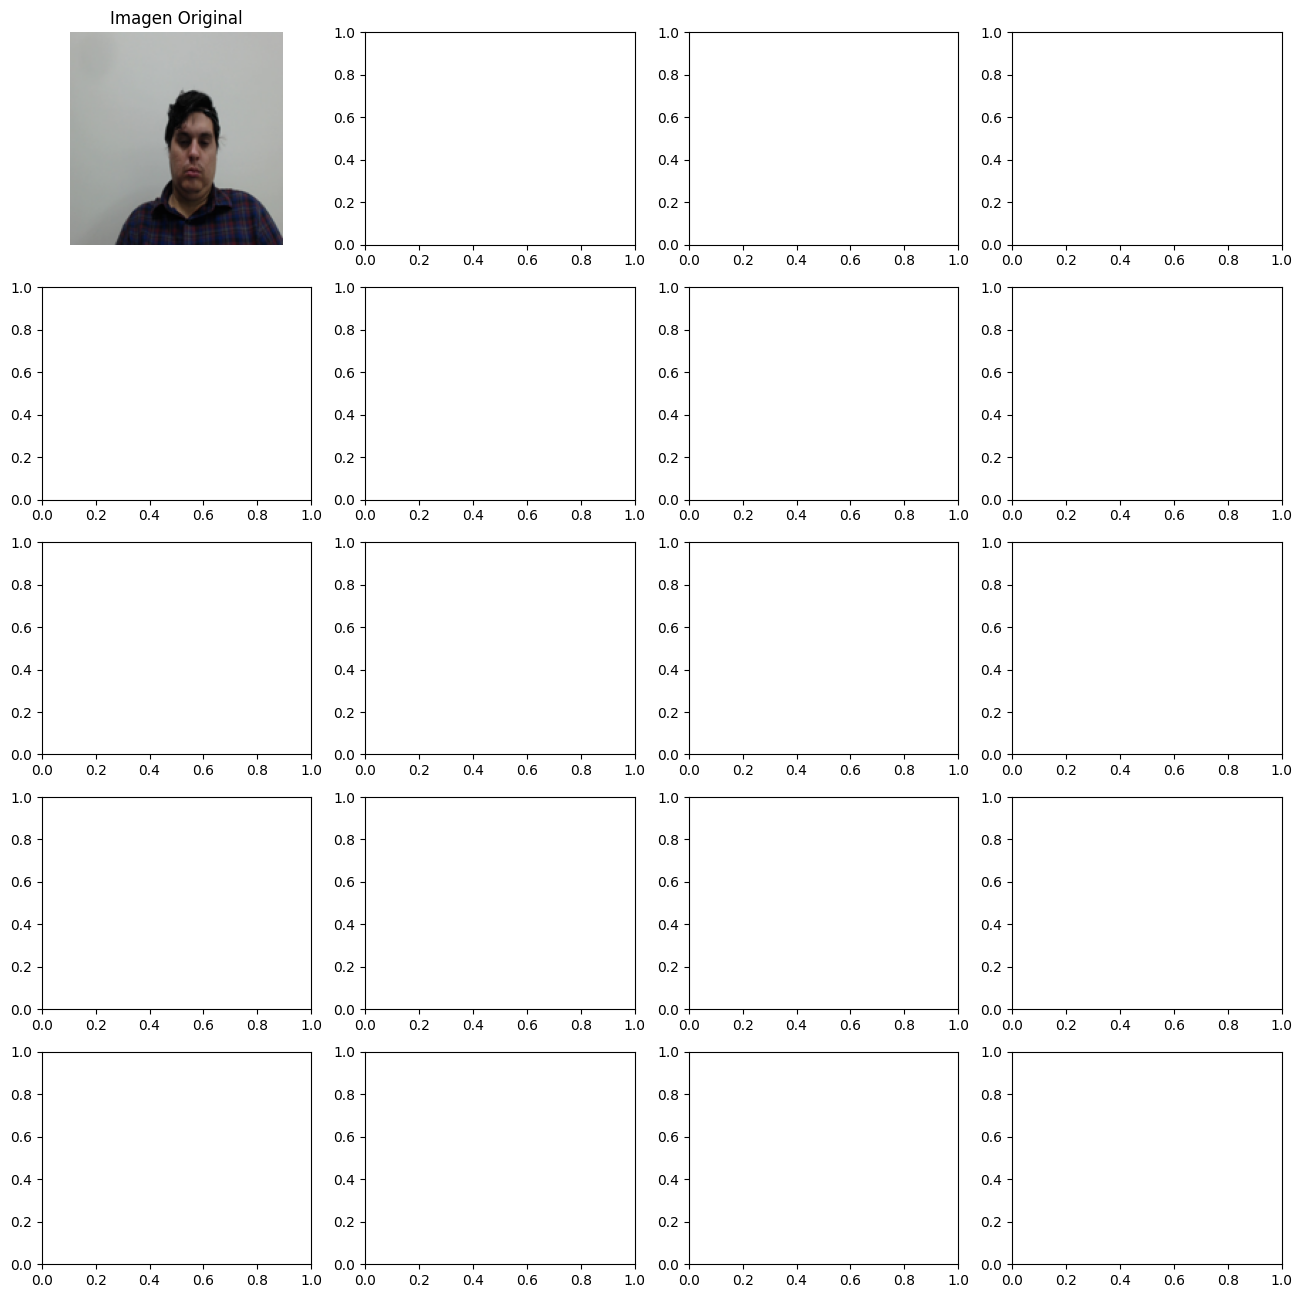

In [47]:


# Visualizar las imágenes seleccionadas con los rostros detectados y los landmarks faciales
fig, axes = plt.subplots(nrows=len(df_ejemplos), ncols=4, figsize=(16, 16))

for i, (index, row) in enumerate(df_ejemplos.iterrows()):
    # Subgráfico para la imagen original
    ax0 = axes[i, 0]
    ax0.imshow(row['Imagen'])
    ax0.set_title("Imagen Original")
    ax0.axis('off')
    
    # Subgráfico para la imagen recortada con el rostro detectado
    ax1 = axes[i, 1]
    imagen_recortada = row['Imagen'][row['Rostro'][0]:row['Rostro'][2], row['Rostro'][3]:row['Rostro'][1]]
    ax1.imshow(imagen_recortada)
    ax1.set_title("Imagen Recortada")
    ax1.axis('off')
    
    # Subgráfico para los landmarks faciales
    ax2 = axes[i, 2]
    ax2.imshow(row['Imagen'])
    for landmark_tipo, landmark_puntos in row['Landmarks'].items():
        for punto in landmark_puntos:
            ax2.plot(punto[0], punto[1], marker='o', markersize=6, color='blue')
    ax2.set_title("Landmarks Faciales")
    ax2.axis('off')
    
    # Subgráfico para la emoción (si está disponible)
    ax3 = axes[i, 3]
    # Aquí puedes agregar código para mostrar la emoción en lugar de un gráfico vacío
    ax3.text(0.5, 0.5, row['Etiqueta'], horizontalalignment='center', verticalalignment='center', fontsize=12)
    ax3.set_title("Emoción")
    ax3.axis('off')

plt.tight_layout()
plt.show()